# Des modèles à intégrer dans mon App mobile de paiement Jkpay

In [193]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import  f1_score,accuracy_score,precision_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [194]:
df = pd.read_csv("paiement_a_temps.csv")
df1 = pd.read_csv("risque_non_paiement.csv")

In [195]:
jkpay = [df,df1]
jkpay

[      historique_retards  montant_a_payer    type_service  \
 0                      2          1054.05  frais internat   
 1                      1           473.39     inscription   
 2                      0           654.70     inscription   
 3                      0          1162.00     inscription   
 4                      3            89.21        minerval   
 ...                  ...              ...             ...   
 1495                   2          1052.33  frais connexes   
 1496                   3          1087.31        minerval   
 1497                   2           596.62  frais internat   
 1498                   0           402.89        minerval   
 1499                   0           137.09     inscription   
 
       notifications_envoyees  paie_a_temps  
 0                          2             1  
 1                          3             1  
 2                          3             1  
 3                          3             1  
 4                      

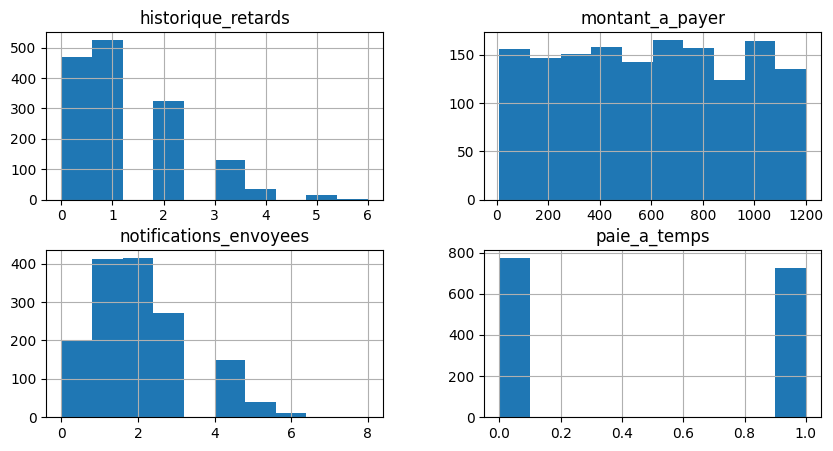

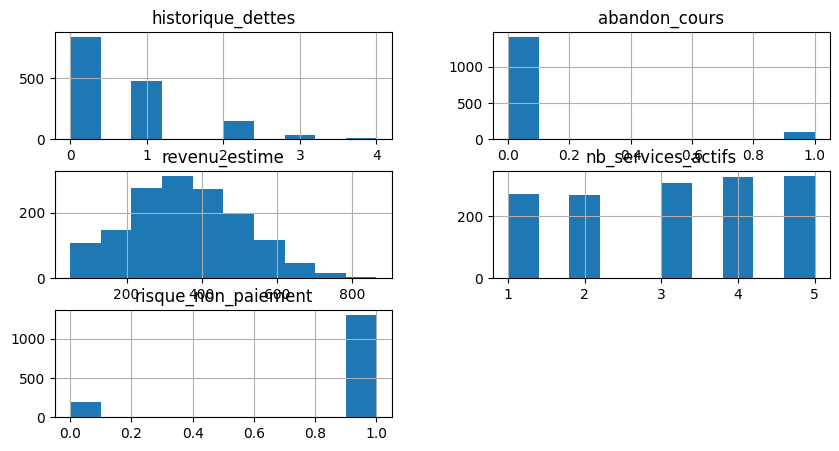

In [196]:
#l'histogramme pour les deux
df.hist(figsize=(10,5))
plt.show()
df1.hist(figsize=(10,5))
plt.show()

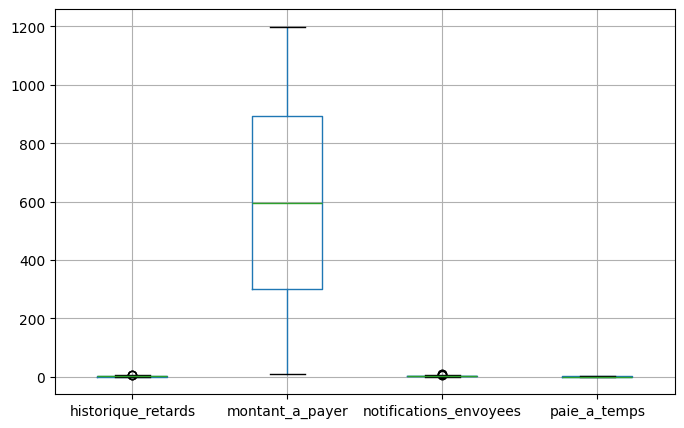

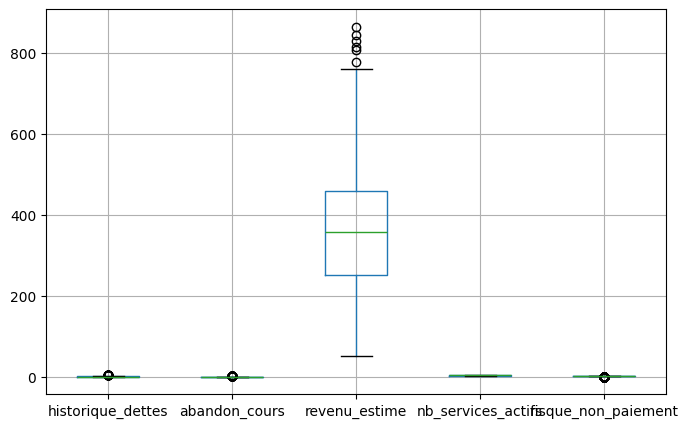

In [197]:
#un box pour les deux
df.boxplot(figsize=(8,5))
plt.show()
df1.boxplot(figsize=(8,5))
plt.show()

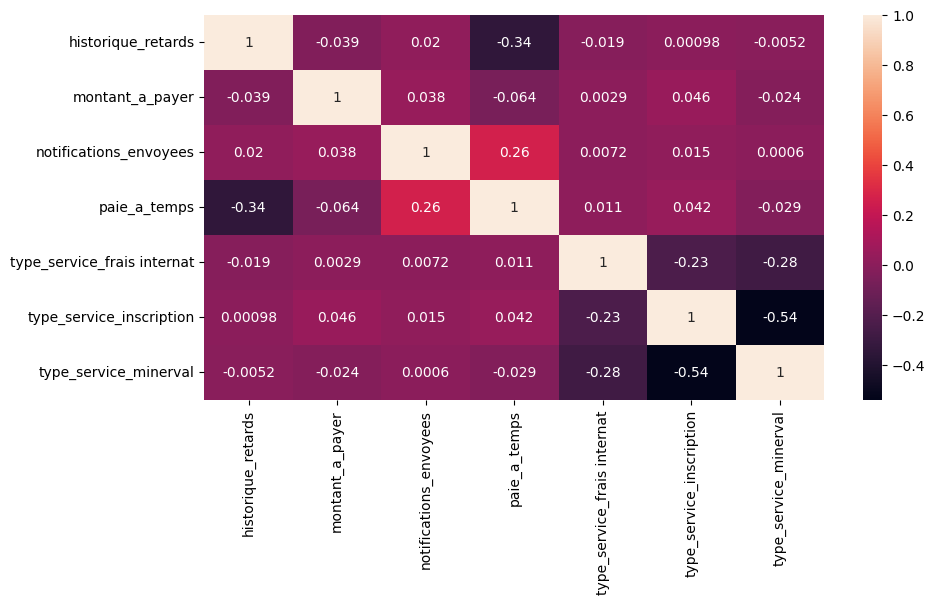

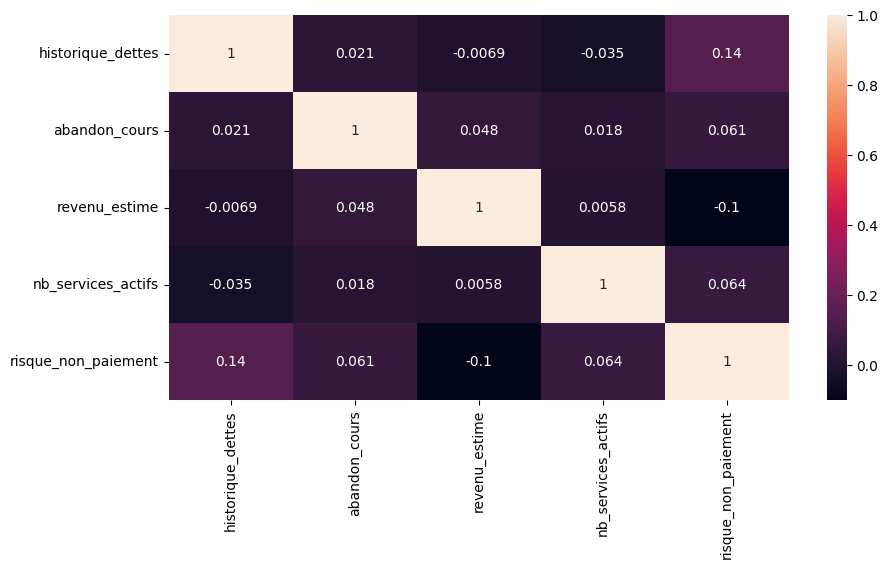

In [198]:
# Matrice de corrélation pour les deux
plt.figure(figsize=(10,5))
encoder_df = pd.get_dummies(df, columns=['type_service'], drop_first=True)
sns.heatmap(encoder_df.corr(),annot=True)
plt.show()
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(),annot=True)
plt.show()

## Bah vérifions la rélarion entre les features et target

<Figure size 800x500 with 0 Axes>

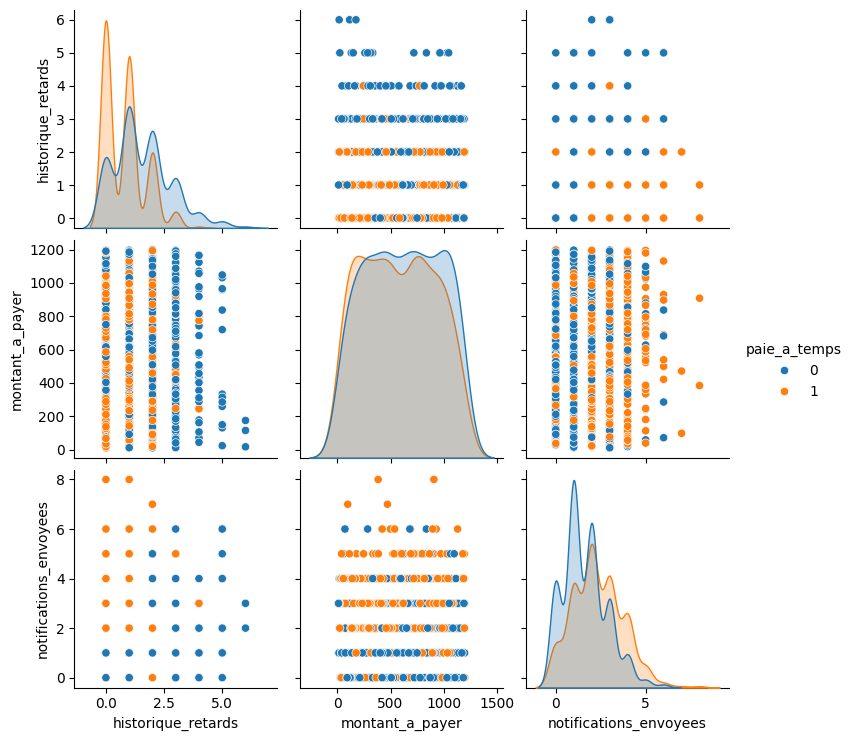

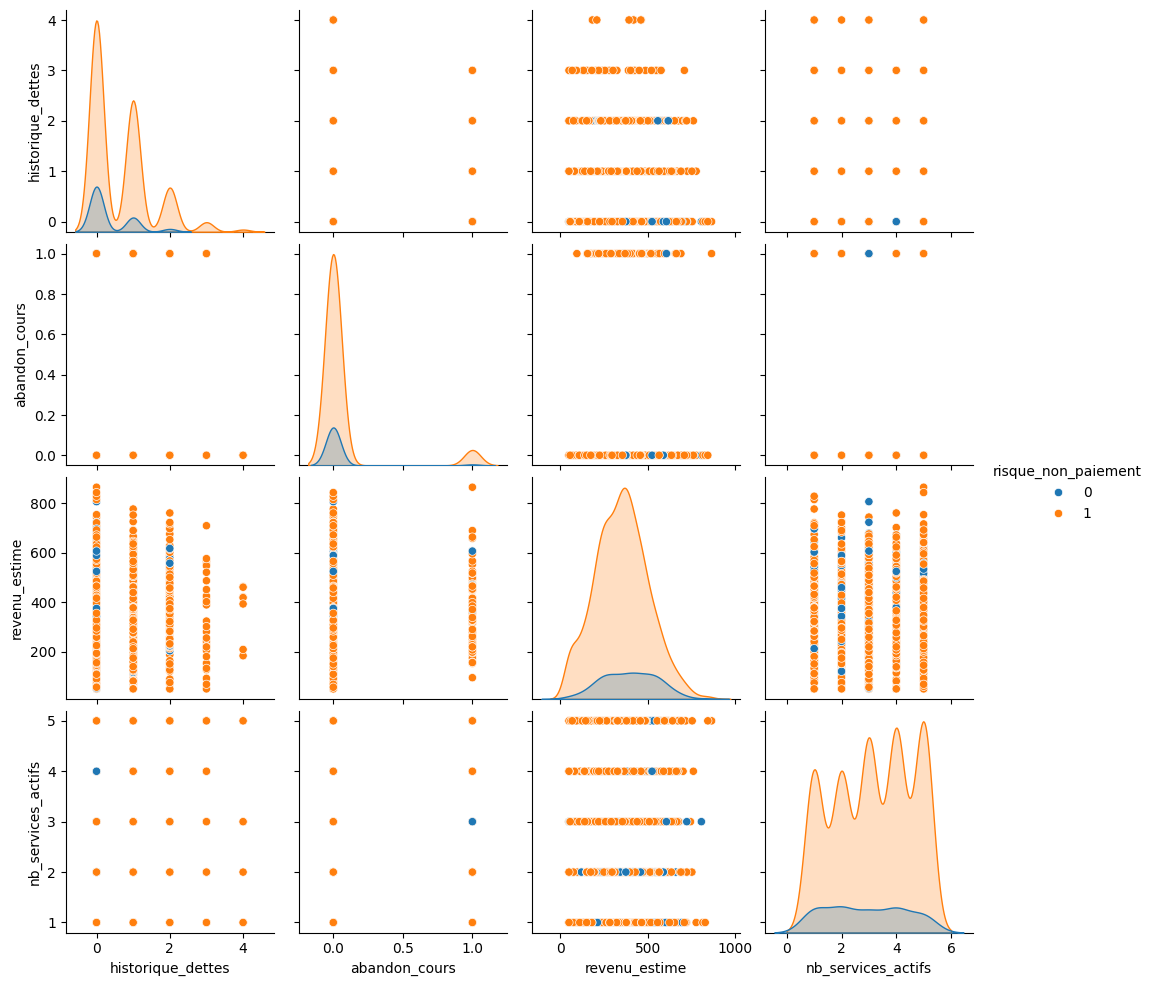

In [199]:
plt.figure(figsize=(8,5))
sns.pairplot(df, hue="paie_a_temps")
plt.show()
sns.pairplot(df1,hue="risque_non_paiement")
plt.show()

In [200]:
df.head()

,historique_retards,montant_a_payer,type_service,notifications_envoyees,paie_a_temps
0,2,1054.05,frais internat,2,1
1,1,473.39,inscription,3,1
2,0,654.70,inscription,3,1
3,0,1162.00,inscription,3,1
4,3,89.21,minerval,2,0


In [159]:
 "Info ", df.info,"Decription",df.describe(),"Description centrée", df.describe().T,"Nombre cols & lignes",df.shape,"Valeurs null ",df.isnull().sum()

('Info ',
 <bound method DataFrame.info of       historique_retards  montant_a_payer    type_service  \
 0                      2          1054.05  frais internat   
 1                      1           473.39     inscription   
 2                      0           654.70     inscription   
 3                      0          1162.00     inscription   
 4                      3            89.21        minerval   
 ...                  ...              ...             ...   
 1495                   2          1052.33  frais connexes   
 1496                   3          1087.31        minerval   
 1497                   2           596.62  frais internat   
 1498                   0           402.89        minerval   
 1499                   0           137.09     inscription   
 
       notifications_envoyees  paie_a_temps  
 0                          2             1  
 1                          3             1  
 2                          3             1  
 3                          

In [160]:
df1.head()

,historique_dettes,abandon_cours,revenu_estime,nb_services_actifs,risque_non_paiement
0,1,0,146.00,1,1
1,0,0,318.07,5,1
2,2,0,205.78,5,1
3,0,0,342.24,2,1
4,0,0,453.16,4,0


In [161]:
 "Info ", df1.info,"Decription",df1.describe(),"Description centrée", df1.describe().T,"Nombre col & lignes",df1.shape,"Valeurs null ",df1.isnull().sum()

('Info ',
 <bound method DataFrame.info of       historique_dettes  abandon_cours  revenu_estime  nb_services_actifs  \
 0                     1              0         146.00                   1   
 1                     0              0         318.07                   5   
 2                     2              0         205.78                   5   
 3                     0              0         342.24                   2   
 4                     0              0         453.16                   4   
 ...                 ...            ...            ...                 ...   
 1495                  1              0         291.01                   3   
 1496                  0              0         355.09                   3   
 1497                  0              0         295.78                   2   
 1498                  0              1         464.97                   1   
 1499                  1              0         564.95                   2   
 
       risque_non_pa

In [162]:
x = df[["historique_retards","montant_a_payer","type_service","notifications_envoyees"]]
y = df["paie_a_temps"]
x = pd.get_dummies(x, columns=['type_service'], drop_first= True )
x_train,x_test,y_train,y_test  = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [163]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.fit(x_test,y_test)

LogisticRegression()

In [164]:
x = df1[["historique_dettes","abandon_cours", "revenu_estime","nb_services_actifs"]]
y = df1["risque_non_paiement"]
x_train1,x_test1,y_train1,y_test1 = train_test_split(x2,y2, test_size = 0.3, random_state=42)

In [165]:
lr1 = LogisticRegression()
lr1.fit(x_train1,y_train1)
lr1.fit(x_test1,y_test1)

LogisticRegression()

In [166]:
train_pred = lr.predict(x_train)
test_pred = lr.predict(x_test)

In [167]:
print(f"Affichage des metrics d'application pour le problème du paiement à temps")
print(" Acurrancy_score_train: ", accuracy_score(y_train,train_pred))
print(" Acurrancy_score_test : ", accuracy_score(y_test,test_pred))
print("précision_score :", precision_score(y_train,train_pred))
print("précision_score :", precision_score(y_test,test_pred))
print("f1_score :", f1_score(y_train,train_pred))
print("f1_score : ", f1_score(y_test,test_pred))


Affichage des metrics d'application pour le problème du paiement à temps
 Acurrancy_score_train:  0.6857142857142857
 Acurrancy_score_test :  0.6844444444444444
précision_score : 0.6575091575091575
précision_score : 0.6752136752136753
f1_score : 0.6851145038167938
f1_score :  0.6899563318777293


In [168]:
train_pred1 = lr1.predict(x_train1)
test_pred1 = lr1.predict(x_test1)

In [169]:
print(f"Affichage des métrics d'application pour le risque du non paiement")
print("acurrancy_train : ", accuracy_score(y_train1,train_pred1))
print("accurancy_test : ", accuracy_score(y_test1, test_pred1))
print("f1_score_train : ", f1_score(y_train1,train_pred1))
print("f1_score_test : ", f1_score(y_test1,test_pred1))
print("precision_train :", precision_score(y_train1,train_pred1))
print("precision_test :", precision_score(y_test1,test_pred1))

Affichage des métrics d'application pour le risque du non paiement
acurrancy_train :  0.5857142857142857
accurancy_test :  0.6333333333333333
f1_score_train :  0.6506024096385542
f1_score_test :  0.6857142857142857
precision_train : 0.6
precision_test : 0.6666666666666666


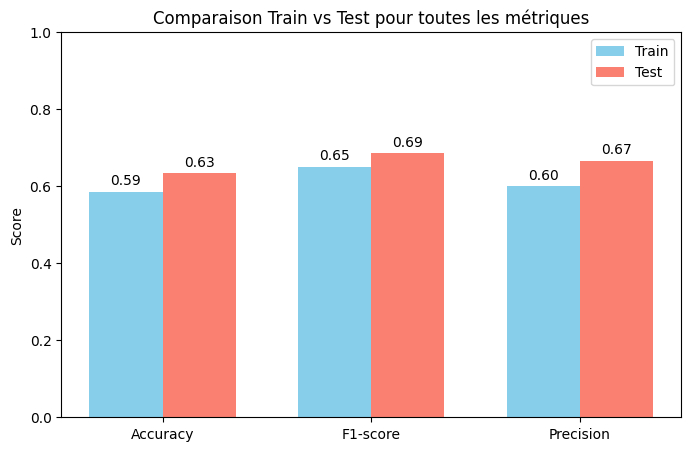

In [173]:
# Interprétation visuelle pour toutes les métriques
metrics = ['Accuracy', 'F1_score', 'Precision']
train_scores = [0.5857, 0.6506, 0.6]
test_scores  = [0.6333, 0.6857, 0.6667]

x = np.arange(len(metrics))
width = 0.35
fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width/2, train_scores, width, label='Train', color='skyblue')
rects2 = ax.bar(x + width/2, test_scores, width, label='Test', color='salmon')

for rects in [rects1, rects2]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_ylabel('Score')
ax.set_title('Comparaison Train vs Test pour toutes les métriques')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
plt.ylim(0,1)
plt.show()


# Bah je rémarque que les données Test sont en supériorité que le train, alors je vérifie s'il y'a des classes deséquilibrées


In [182]:
df["paie_a_temps"].value_counts()

,count
paie_a_temps,
0,774
1,726


In [181]:
df1["risque_non_paiement"].value_counts()

,count
risque_non_paiement,
1,1299
0,201


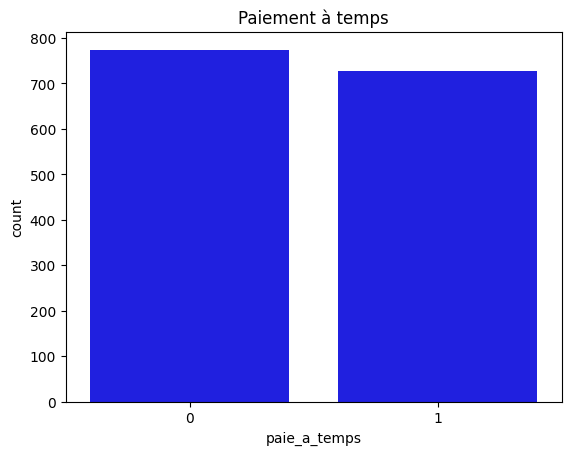

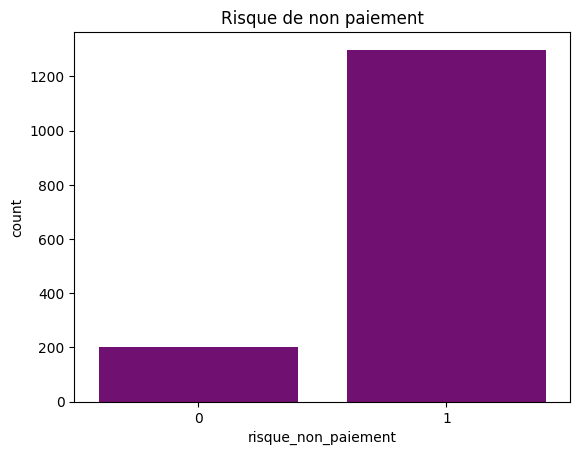

In [184]:
sns.countplot(x="paie_a_temps", data=df, color="blue")
plt.title("Paiement à temps")
plt.show()
sns.countplot(x="risque_non_paiement", data=df1, color="purple")
plt.title("Risque de non paiement")
plt.show()

In [170]:
#données de la matrice de confusion
conf_matrix_df = confusion_matrix(y_test, test_pred)
conf_matrix_df1 = confusion_matrix(y_test1, test_pred1)
print("Matrice pour paiement à temps",conf_matrix_df)
print("Matrice pour risque non paiement",conf_matrix_df1)

Matrice pour paiement à temps [[150  76]
 [ 66 158]]
Matrice pour risque non paiement [[ 7  6]
 [ 5 12]]


In [171]:
#rapport du matrix de rapport
print("rapport paiement à temps :",classification_report(y_test, test_pred))
print("Rappor risque non paiement :",classification_report(y_test1, test_pred1))

rapport paiement à temps :               precision    recall  f1-score   support

           0       0.69      0.66      0.68       226
           1       0.68      0.71      0.69       224

    accuracy                           0.68       450
   macro avg       0.68      0.68      0.68       450
weighted avg       0.68      0.68      0.68       450

Rappor risque non paiement :               precision    recall  f1-score   support

           0       0.58      0.54      0.56        13
           1       0.67      0.71      0.69        17

    accuracy                           0.63        30
   macro avg       0.62      0.62      0.62        30
weighted avg       0.63      0.63      0.63        30



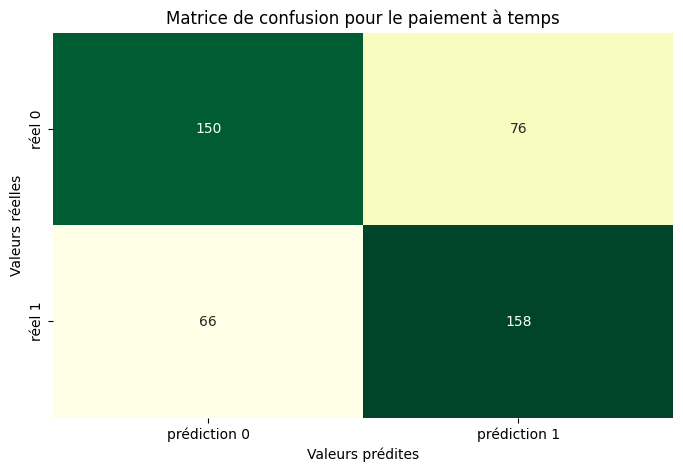

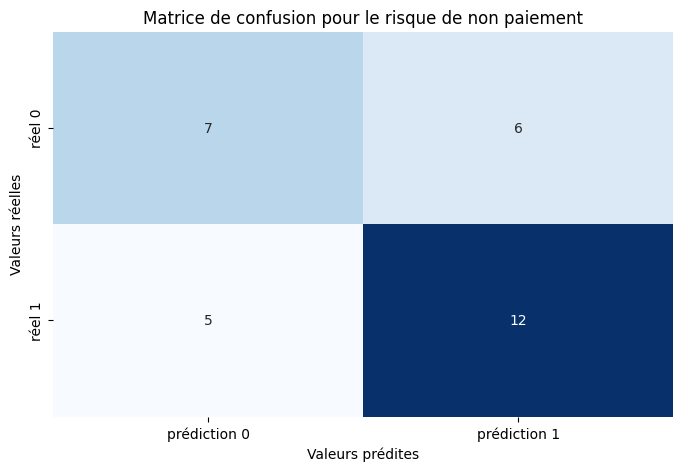

In [185]:
#Bah now je montre ça sous forme graphique
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix_df,annot=True,fmt="d",cmap="YlGn",cbar=False,
            xticklabels=['prédiction 0','prédiction 1'], yticklabels=['réel 0', 'réel 1'])
plt.title("Matrice de confusion pour le paiement à temps")
plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")
plt.show()
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix_df1, annot=True, fmt="d", cmap="Blues",cbar=False,
            xticklabels=['prédiction 0','prédiction 1'], yticklabels=['réel 0', 'réel 1'])
plt.title("Matrice de confusion pour le risque de non paiement")
plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")
plt.show()

In [254]:
df1.head()

,historique_dettes,abandon_cours,revenu_estime,nb_services_actifs,risque_non_paiement
0,1,0,146.00,1,1
1,0,0,318.07,5,1
2,2,0,205.78,5,1
3,0,0,342.24,2,1
4,0,0,453.16,4,0


# Prédiction

In [253]:
features = x_train.columns.tolist()
nouvellePred = pd.DataFrame(0, index=[0], columns=features)
nouvellePred['historique_retards'] = 100
nouvellePred['montant_a_payer'] = 400
nouvellePred['notifications_envoyees'] = 1000
if 'type_service_minerval' in features:
    nouvellePred['type_service_minerval'] = 1
    prediction = lr.predict(nouvellePred)[0]
    if prediction == 0 :
        print("L'étudiant paiera à temps")
    else :
        print("L'étudiant ne paiera pas à temps")
else:
  print(f'⚠️ ce frais n\'est pas pris en compte par notre institution')

L'étudiant ne paiera pas à temps


In [263]:
features1 = x_train1.columns.tolist()
nouvellePred1 = pd.DataFrame(0, index=[0], columns=features1)
nouvellePred1['historique_dettes'] = 10
nouvellePred1['abandon_cours'] = 1
nouvellePred1['revenu_estime'] = 1
nouvellePred1['nb_services_actifs'] = 1
prediction = lr1.predict(nouvellePred1)[0]
if prediction == 0 :
  print("L'étudiant ne risque pas de non paiement")
else :
  print("L'étudiant risque de non paiement")

L'étudiant ne risque pas de non paiement
